In [1]:
# import basic library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Part A: Numerical Prediction

## Step1: Locate, input and clean suitable data

### Instruction
This research intends to pinpoint the most relevant factors against their existing medical expense to be used for predicting future medical expenses of individuals that help medical insurance to make decision on charging the premium.

#### Description of Data:
The data is sourced from Kaggle. The dataset contains 1,338 observations and 7 variables.

In [2]:
# read the dataset using pandas
insurance_Data = pd.read_csv('https://raw.githubusercontent.com/xiaolancara/product_studio/master/insurance.csv')
insurance_Data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
insurance_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
insurance_Data.shape

(1338, 7)

In [5]:
insurance_Data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [6]:
insurance_Data["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [7]:
insurance_Data["sex"] = insurance_Data.sex.replace({'male':1,'female':2})

In [8]:
insurance_Data["smoker"] = insurance_Data.smoker.replace({'yes':1,'no':0})

In [9]:
insurance_Data["region"].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [10]:
insurance_Data["region"] = insurance_Data.region.replace({'southeast':1,'southwest':2,'northwest':3,'northeast':4})

In [11]:
insurance_Data.describe()

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,1.494768,30.665471,1.094918,0.204783,2.455157,13270.422414
std,14.049960,0.500160,6.098382,1.205493,0.403694,1.130197,12110.011240
min,18.000000,1.000000,16.000000,0.000000,0.000000,1.000000,1121.870000
25%,27.000000,1.000000,26.300000,0.000000,0.000000,1.000000,4740.287500
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.030000
75%,51.000000,2.000000,34.700000,2.000000,0.000000,3.000000,16639.915000
max,64.000000,2.000000,53.100000,5.000000,1.000000,4.000000,63770.430000


In [12]:
insurance_Data.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,1,31.0,3,0,3,10600.55
1334,18,2,31.9,0,0,4,2205.98
1335,18,2,36.9,0,0,1,1629.83
1336,21,2,25.8,0,0,2,2007.95
1337,61,2,29.1,0,1,3,29141.36


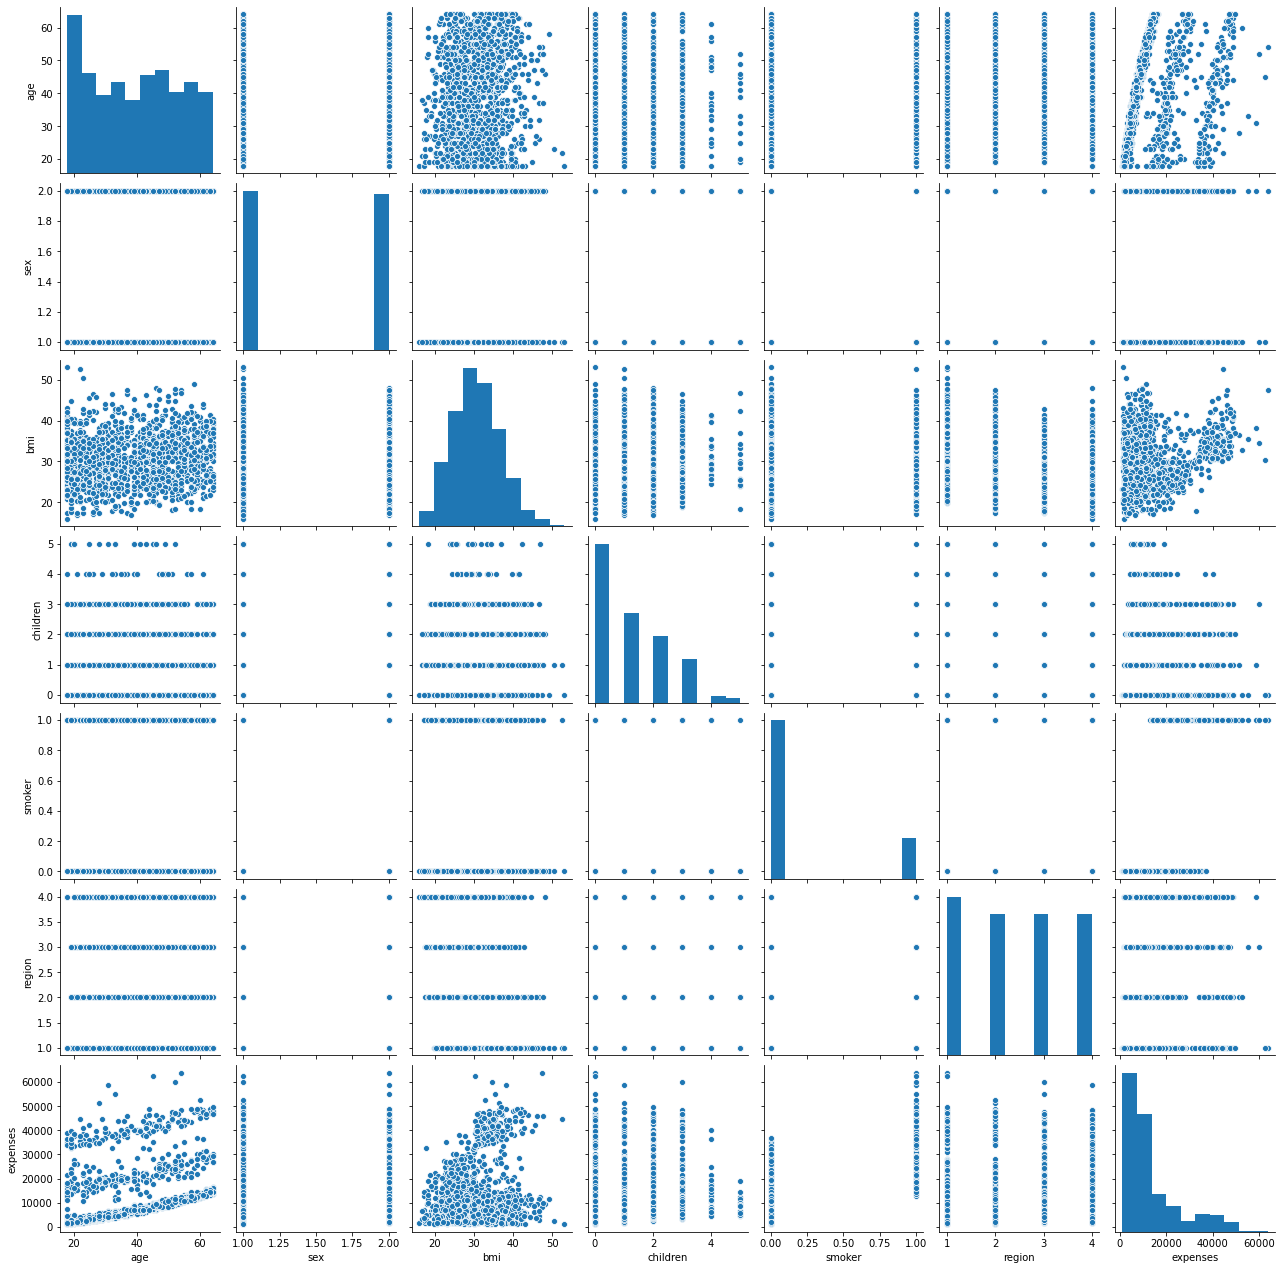

In [13]:
sns.pairplot(data=insurance_Data)

,age,sex,bmi,children,smoker,region,expenses
age,1.000000,0.020856,0.109341,0.042469,-0.025019,0.006308,0.299008
sex,0.020856,1.000000,-0.046380,-0.017163,-0.076185,0.012816,-0.057292
bmi,0.109341,-0.046380,1.000000,0.012645,0.003968,-0.262750,0.198576
children,0.042469,-0.017163,0.012645,1.000000,0.007673,0.001205,0.067998
smoker,-0.025019,-0.076185,0.003968,0.007673,1.000000,-0.038873,0.787251
region,0.006308,0.012816,-0.262750,0.001205,-0.038873,1.000000,-0.039473
expenses,0.299008,-0.057292,0.198576,0.067998,0.787251,-0.039473,1.000000


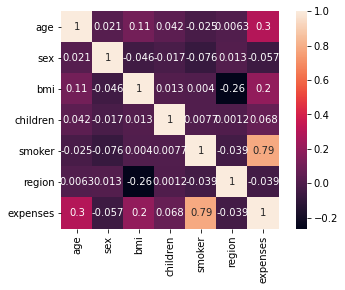

In [14]:
# relationship of numerical data--- Correlation Map
corr = insurance_Data.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)
corr

From the above plot and correlation outputs, its known that sex and region variables are negatively correlated with expenses.
So, leaving these variables and making the model.

## Step2: Construct predictive models

#### prepare data: split data to train and test

In [15]:
from sklearn.model_selection import train_test_split

train_data = insurance_Data.drop(columns = ["expenses","sex","region"]).astype('int')
train_target = insurance_Data[['expenses']].astype('int')

#The data is divided into training set and test set
X_train,X_test,Y_train,Y_test = train_test_split(train_data,train_target,test_size = 0.3,random_state = 1)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(936, 4)
(936, 1)
(402, 4)
(402, 1)


###  Linear regression

In [16]:
from sklearn.linear_model import LinearRegression
LinearRegression = LinearRegression()
LinearRegression.fit(X_train,Y_train)
LinearRegression_predictTrain = LinearRegression.predict(X_train)
LinearRegression_predictTest = LinearRegression.predict(X_test)

print('intercept: ' + str(LinearRegression.intercept_))
print('coefficient: '+ str(LinearRegression.coef_))


intercept: [-11111.52628269]
coefficient: [[  252.30177075   306.34931901   343.91800797 24036.28080088]]


 - Based on the output, the intercept value is -11111.526. The coefficients b1, b2, b3, b4 are 252.301, 306.349, 343.918, 24036.280 respectively. 
- The regression model can be written, y = -11243.072 + 252.3255(age) + 306.039(bmi) + 342.639(children) + 24028.361(smoker).

###  Gradient Boosting

In [21]:
from sklearn.ensemble import GradientBoostingRegressor as GBR
gbr = GBR()
gbr.fit(X_train, Y_train.values.ravel())
gbr_predictTrain = gbr.predict(X_train)
gbr_predictTest = gbr.predict(X_test)

###  Decision Tree

In [18]:
# use Regressor Decision Tree
from   sklearn.tree import DecisionTreeRegressor

DecisionTree = DecisionTreeRegressor() 
DecisionTree.fit(X_train,Y_train) # train
decisionTree_predictTrain = DecisionTree.predict(X_train)
decisionTree_predictTest = DecisionTree.predict(X_test)

###  SVM

In [19]:
from sklearn import svm

SVM = svm.SVC(C=2,kernel='rbf',gamma=10,decision_function_shape='ovr') # ovr:一对多策略
SVM.fit(X_train,Y_train.values.ravel())

SVM_predictTrain=SVM.predict(X_train) #训练集的预测标签
SVM_predictTest=SVM.predict(X_test) #测试集的预测标签

## Step 3: Analyze model performance metrics (RMSE, MAE and R2)

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from math import sqrt
 
# Analyze LinearRegression model performance metrics (RMSE, MAE and R2)
print("RMSE - Train_data :" ,sqrt(mean_squared_error(Y_train,LinearRegression_predictTrain)))
print("RMSE - Test_data :" ,sqrt(mean_squared_error(Y_test,LinearRegression_predictTest)))
print("MAE - Train_data :" ,mean_absolute_error(Y_train,LinearRegression_predictTrain))
print("MAE - Test_data :" ,mean_absolute_error(Y_test,LinearRegression_predictTest))
print("R2 - Train_data :" ,r2_score(Y_train,LinearRegression_predictTrain))
print("R2 - Test_data :" ,r2_score(Y_test,LinearRegression_predictTest))

RMSE - Train_data : 6051.220864990229
RMSE - Test_data : 6085.792624925608
MAE - Train_data : 4166.01522105707
MAE - Test_data : 4131.7774282862065
R2 - Train_data : 0.7536105439229962
R2 - Test_data : 0.738655539068305


In [24]:
# Analyze GBR model performance metrics (RMSE, MAE and R2)
print("RMSE - Train_data :" ,sqrt(mean_squared_error(Y_train,gbr_predictTrain)))
print("RMSE - Test_data :" ,sqrt(mean_squared_error(Y_test,gbr_predictTest)))
print("MAE - Train_data :" ,mean_absolute_error(Y_train,gbr_predictTrain))
print("MAE - Test_data :" ,mean_absolute_error(Y_test,gbr_predictTest))
print("R2 - Train_data :" ,r2_score(Y_train,gbr_predictTrain))
print("R2 - Test_data :" ,r2_score(Y_test,gbr_predictTest))

RMSE - Train_data : 4012.4484616547616
RMSE - Test_data : 4410.911774835121
MAE - Train_data : 2207.027840319218
MAE - Test_data : 2410.414404177665
R2 - Train_data : 0.8916684283757674
R2 - Test_data : 0.862710999479815


In [25]:
# Analyze Regression DecisionTree model performance metrics (RMSE, MAE and R2)
print("RMSE - Train_data :" ,sqrt(mean_squared_error(Y_train,decisionTree_predictTrain)))
print("RMSE - Test_data :" ,sqrt(mean_squared_error(Y_test,decisionTree_predictTest)))
print("MAE - Train_data :" ,mean_absolute_error(Y_train,decisionTree_predictTrain))
print("MAE - Test_data :" ,mean_absolute_error(Y_test,decisionTree_predictTest))
print("R2 - Train_data :" ,r2_score(Y_train,decisionTree_predictTrain))
print("R2 - Test_data :" ,r2_score(Y_test,decisionTree_predictTest))

RMSE - Train_data : 1470.1981518119142
RMSE - Test_data : 6857.2927559282325
MAE - Train_data : 321.08404558404555
MAE - Test_data : 3378.467247097844
R2 - Train_data : 0.9854558664269092
R2 - Test_data : 0.6681938871038513


In [26]:
# Analyze SVM model performance metrics (RMSE, MAE and R2)
print("RMSE - Train_data :" ,sqrt(mean_squared_error(Y_train,SVM_predictTrain)))
print("RMSE - Test_data :" ,sqrt(mean_squared_error(Y_test,SVM_predictTest)))
print("MAE - Train_data :" ,mean_absolute_error(Y_train,SVM_predictTrain))
print("MAE - Test_data :" ,mean_absolute_error(Y_test,SVM_predictTest))
print("R2 - Train_data :" ,r2_score(Y_train,SVM_predictTrain))
print("R2 - Test_data :" ,r2_score(Y_test,SVM_predictTest))

RMSE - Train_data : 2167.2713027151563
RMSE - Test_data : 11915.255071040661
MAE - Train_data : 346.508547008547
MAE - Test_data : 7368.36815920398
R2 - Train_data : 0.9683944996253269
R2 - Test_data : -0.0018107515255418871


#### Result: From above results, we can see that the Gradient boost model have the best prediction

# Part B: Yes/No Prediction

### Instruction
This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression Data Preparation.

#### Description of Data:
The data is sourced from Kaggle. The dataset contains 4,240 observations and 16 variables.
- male -    0 = Female; 1 = Male;
- age -   Age at exam time.
- education -   1 = Some High School; 2 = High School or GED; 3 = Some College or Vocational School; 4 = college
- currentSmoker -   0 = nonsmoker; 1 = smoker
- cigsPerDay -   number of cigarettes smoked per day (estimated average)
- BPMeds -   whether or not the patient was on blood pressure medication  0 = Not on Blood Pressure medications; 1 = Is on Blood Pressure medications
- prevalentStroke -   whether or not the patient had previously had a stroke 0 = No; 1 = Yes
- prevalentHyp -  whether or not the patient was hypertensive 0 = No; 1 = Yes
- diabetes -  whether or not the patient had diabetes  0 = No; 1 = Yes
- totChol -  total cholesterol level mg/dL
- sysBP -   systolic blood pressure  mm/Hg
- diaBP -    diastolic blood pressure  mm/Hg
- BMI -    Body Mass Index calculated as: Weight (kg) / Height(meter-squared)
- heartRate -    Beats/Min (Ventricular)
- glucose -   glucose level mg/dL
- TenYearCHD  - 10 year risk of coronary heart disease  0 = No; 1 = Yes

In [63]:
heart_data = pd.read_csv('https://raw.githubusercontent.com/xiaolancara/product_studio/master/framingham.csv')
heart_data.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [64]:
heart_data.shape

(4240, 16)

In [65]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [66]:
heart_data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [67]:
heart_data = heart_data.dropna(axis=0)
heart_data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

drop attribute 'education' since it is not the cause of the heart disease.

In [68]:
heart_data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
mean,0.443685,49.551941,1.980317,0.489065,9.025424,0.030344,0.005741,0.311646,0.027064,236.847731,132.370558,82.917031,25.782802,75.730727,81.852925,0.152269
std,0.496886,8.562029,1.022656,0.499949,11.921590,0.171557,0.075561,0.463229,0.162292,44.097681,22.086866,11.974258,4.065601,11.981525,23.904164,0.359331
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.875000,90.000000,28.037500,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [69]:
heart_data.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.024412,0.017729,0.206114,0.330322,-0.052124,-0.002312,0.001424,0.013819,-0.070321,-0.045358,0.051872,0.073111,-0.115285,0.002940,0.091688
age,-0.024412,1.000000,-0.159499,-0.210771,-0.189295,0.134732,0.050893,0.306239,0.109092,0.268252,0.388267,0.208283,0.137511,-0.002722,0.118349,0.233983
education,0.017729,-0.159499,1.000000,0.025251,0.013790,-0.013739,-0.030386,-0.078828,-0.039627,-0.013522,-0.124360,-0.058059,-0.137555,-0.064214,-0.031998,-0.063279
currentSmoker,0.206114,-0.210771,0.025251,1.000000,0.773913,-0.051923,-0.038150,-0.108078,-0.041849,-0.051034,-0.134428,-0.115955,-0.159821,0.050841,-0.053242,0.019165
cigsPerDay,0.330322,-0.189295,0.013790,0.773913,1.000000,-0.046504,-0.036286,-0.070460,-0.036961,-0.030400,-0.094781,-0.056746,-0.087395,0.064030,-0.053726,0.052014
BPMeds,-0.052124,0.134732,-0.013739,-0.051923,-0.046504,1.000000,0.113125,0.262910,0.049066,0.094083,0.271263,0.199630,0.105642,0.012889,0.054232,0.089152
prevalentStroke,-0.002312,0.050893,-0.030386,-0.038150,-0.036286,0.113125,1.000000,0.066057,0.009625,0.012736,0.061070,0.055834,0.036496,-0.017019,0.016061,0.048366
prevalentHyp,0.001424,0.306239,-0.078828,-0.108078,-0.070460,0.262910,0.066057,1.000000,0.080556,0.166655,0.697675,0.617734,0.302949,0.146818,0.086942,0.181387
diabetes,0.013819,0.109092,-0.039627,-0.041849,-0.036961,0.049066,0.009625,0.080556,1.000000,0.048451,0.102552,0.050686,0.089009,0.060984,0.614820,0.093431
totChol,-0.070321,0.268252,-0.013522,-0.051034,-0.030400,0.094083,0.012736,0.166655,0.048451,1.000000,0.219925,0.174422,0.121056,0.093053,0.049884,0.091338


According to the correlation, the 'education' has negative effect to the target 'TenYearCHD' so the column 'educaition' should be dropped.

In [70]:
heart_data = heart_data.drop(['education'],axis = 1)

In [72]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(heart_trainData,heart_trainTarget)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(heart_trainData.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['element','Score']  #naming the dataframe columns
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

,element,Score
9,sysBP,669.136021
13,glucose,379.914235
1,age,296.200344
8,totChol,250.490205
3,cigsPerDay,155.798307
10,diaBP,142.521814
6,prevalentHyp,82.845455
7,diabetes,31.067621
4,BPMeds,28.191569
0,male,17.107751


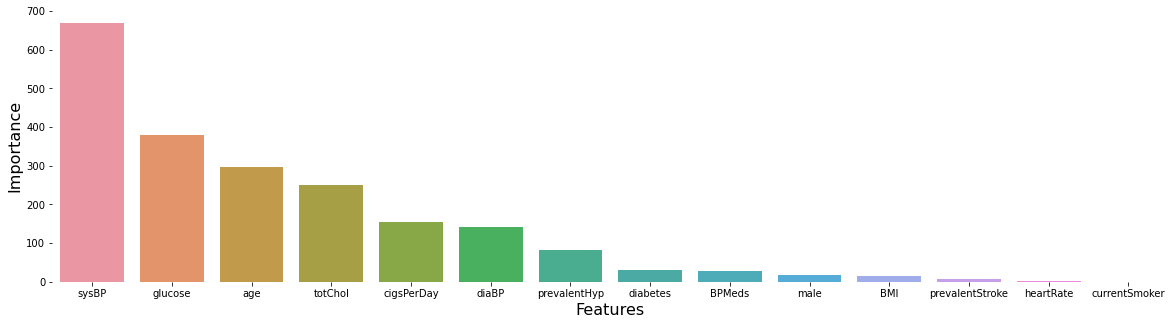

In [73]:
plt.figure(figsize=(20,5))
sns.barplot(x='element', y='Score', data= featureScores)
plt.box(False)
plt.xlabel('Features', fontsize=16)
plt.ylabel('Importance',fontsize=16)
plt.show()

In [81]:
# selecting the 7 most impactful features for the target variable
features_list = featureScores["element"].tolist()[:7]
features_list

['sysBP', 'glucose', 'age', 'totChol', 'cigsPerDay', 'diaBP', 'prevalentHyp']

In [82]:
heart_data = heart_data[['sysBP', 'glucose', 'age', 'totChol', 'cigsPerDay', 'diaBP', 'prevalentHyp','TenYearCHD']] 
#'diabetes', 'BPMeds', 'male'
heart_data.head()

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,TenYearCHD
0,106.0,77.0,39,195.0,0.0,70.0,0,0
1,121.0,76.0,46,250.0,0.0,81.0,0,0
2,127.5,70.0,48,245.0,20.0,80.0,0,0
3,150.0,103.0,61,225.0,30.0,95.0,1,1
4,130.0,85.0,46,285.0,23.0,84.0,0,0


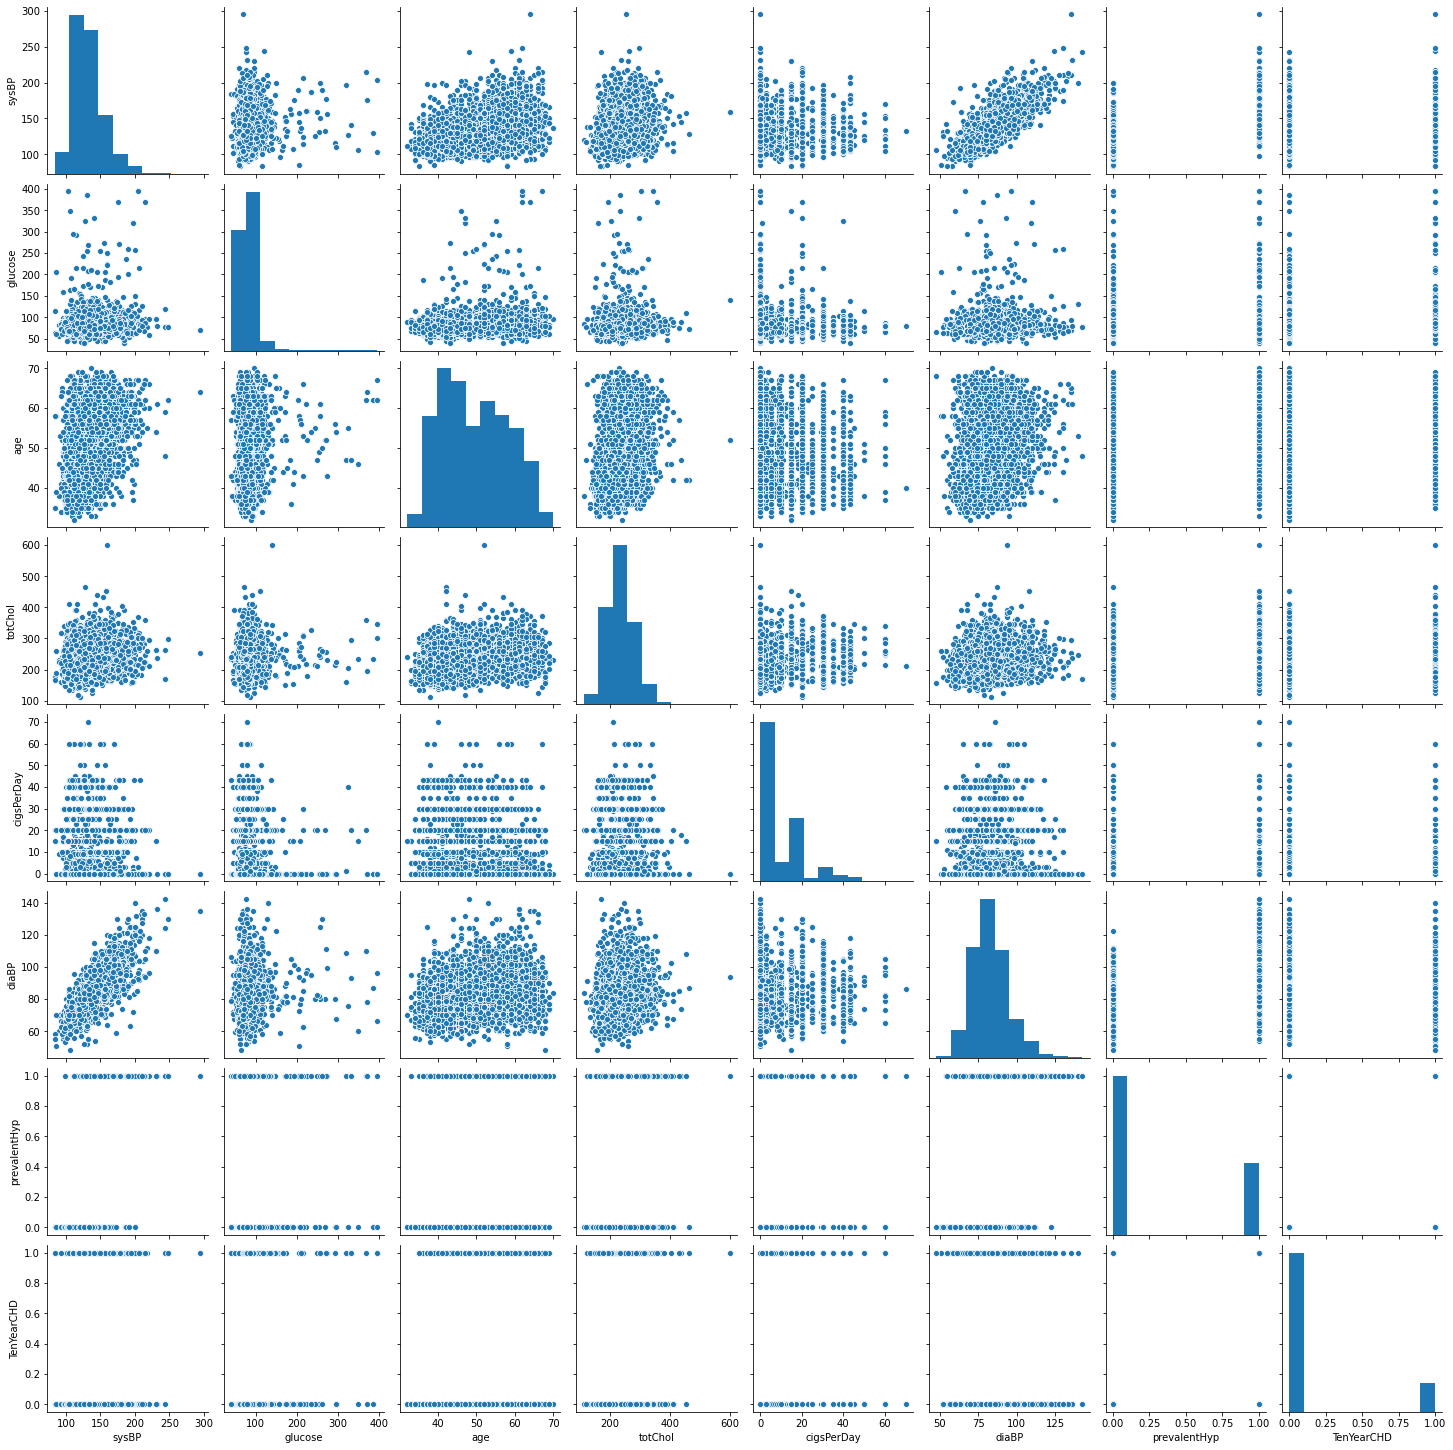

In [83]:
sns.pairplot(data = heart_data)

In [84]:
from sklearn.model_selection import train_test_split

heart_trainData = heart_data.drop(['TenYearCHD'], axis = 1)
heart_trainTarget = heart_data['TenYearCHD']

#The data is divided into training set and test set
heartX_train,heartX_test,heartY_train,heartY_test = train_test_split(heart_trainData,heart_trainTarget,test_size = 0.3,random_state = 1)
print(heartX_train.shape)
print(heartY_train.shape)
print(heartX_test.shape)
print(heartY_test.shape)

(2560, 7)
(2560,)
(1098, 7)
(1098,)


## Step 2: Construct at least 3 different logistic models using Python

### Binary Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression
heart_LR = LogisticRegression(max_iter=2600)
heart_LR.fit(heartX_train,heartY_train)
heart_LR_predictTest= heart_LR.predict(heartX_test)


### Multinomial Logistic Regression

In [96]:
heart_MultiLR = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='newton-cg').fit(heartX_train, heartY_train)
heart_MultiLR_predictTest = heart_MultiLR.predict(heartX_test)

#print the tunable parameters
params = heart_MultiLR.get_params()
print(params)
#Print model parameters
print('Intercept: \n', heart_MultiLR.intercept_)
print('Coefficients: \n', heart_MultiLR.coef_)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'none', 'random_state': 0, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Intercept: 
 [-4.4802809]
Coefficients: 
 [[0.00643092 0.00411531 0.03468654 0.00104308 0.01305134 0.00257161
  0.0538137 ]]


In [97]:
import statsmodels.api as sm
#Use statsmodels to assess variables
logit_model=sm.MNLogit(heartY_train,sm.add_constant(heartX_train))
logit_model
result=logit_model.fit()
stats1=result.summary()
stats2=result.summary2()
print(stats1)
print(stats2)

Optimization terminated successfully.
         Current function value: 0.379783
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:             TenYearCHD   No. Observations:                 2560
Model:                        MNLogit   Df Residuals:                     2552
Method:                           MLE   Df Model:                            7
Date:                Wed, 21 Oct 2020   Pseudo R-squ.:                  0.1101
Time:                        19:06:59   Log-Likelihood:                -972.24
converged:                       True   LL-Null:                       -1092.5
Covariance Type:            nonrobust   LLR p-value:                 2.929e-48
TenYearCHD=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -8.9606      0.702    -12.763      0.000     -10.337      -7.585
sysBP            0.0129

### Ordinal Logistic Regression

I am still learning..

## Step 3: Analyze model performance metrics (AUC, ROC, Confusion Matrix) 

True Positives:12
False Positives:7
True Negatives:924
False Negatives:155


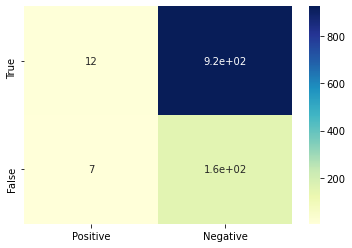

In [86]:
from sklearn.metrics import confusion_matrix
# If the patient actually has a heart attack and the doctor confirms it, it's called TP
# If the patient actually has no heart disease and the doctor confirms that he or she has no heart disease, it is called TN
# If the patient actually has no heart disease and the doctor has confirmed that he has, it is called FP
# If the patient actually has a heart attack and the doctor confirms that he doesn't, it's called FN

tn, fp, fn, tp = confusion_matrix(heartY_test, heart_LR_predictTest).ravel()
print('True Positives:' + str(tp))
print('False Positives:' + str(fp))
print('True Negatives:' + str(tn))
print('False Negatives:'+ str(fn))
matrix = [[tp, tn], [fp, fn]]
df_confusion_matrix = pd.DataFrame(matrix, index=["True", "False"], columns=["Positive", "Negative"])
sns.heatmap(df_confusion_matrix,annot=True,cmap="YlGnBu")


#####  Optimize the Confusion Matrix

In [89]:
# select the probabilities for the positive class only
probas = heart_LR.predict_proba(heartX_test)[:, 1]
# convert predictions accroding to various threshold rates.
def get_preds(threshold, probabilities):
    return [1 if prob > threshold else 0 for prob in probabilities]

# create a lists of True Positive Rates and False Positive Rates at varying threshold rates
roc_values = []
for thresh in np.linspace(0, 1, 100):
    preds = get_preds(thresh, probas)
    tn, fp, fn, tp = confusion_matrix(heartY_test, preds).ravel()
    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    roc_values.append([tpr, fpr])
tpr_values, fpr_values = zip(*roc_values)

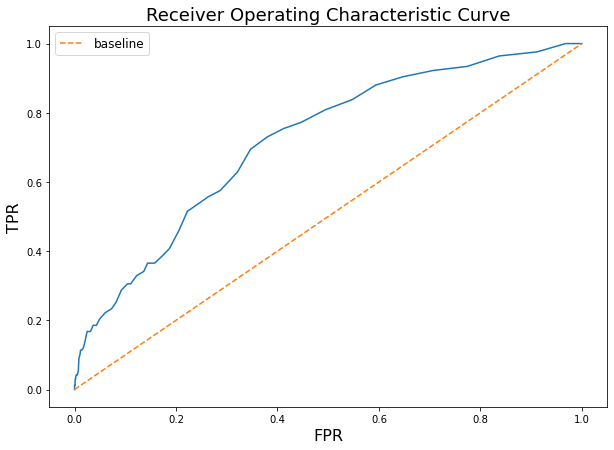

In [93]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(fpr_values, tpr_values)
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.title('Receiver Operating Characteristic Curve', fontsize=18)
plt.ylabel('TPR', fontsize=16)
plt.xlabel('FPR', fontsize=16)
plt.legend(fontsize=12);

In [109]:
from sklearn.metrics import roc_auc_score
roc_auc_score(heartY_test, preds)

0.5

-  The accuracy of Binary Logistic Regression model is poor with 50% of predictions being correct after Optimize data

In [101]:
# accuracy statistics
from sklearn import metrics
from sklearn.metrics import classification_report

print('Accuracy Score:', metrics.accuracy_score(heartY_test, heart_MultiLR_predictTest))
# create classification report
class_report=classification_report(heartY_test, heart_MultiLR_predictTest)
print(class_report)

Accuracy Score: 0.8533697632058288
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       931
           1       0.65      0.08      0.14       167

    accuracy                           0.85      1098
   macro avg       0.75      0.54      0.53      1098
weighted avg       0.83      0.85      0.80      1098



-  The accuracy of Multinomial Logistic Regression model is better with 85% of predictions being correct. 

True Positives:13
False Positives:7
True Negatives:924
False Negatives:154


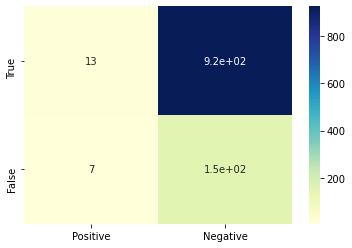

In [107]:
tn_mul, fp_mul, fn_mul, tp_mul = confusion_matrix(heartY_test, heart_MultiLR_predictTest).ravel()
print('True Positives:' + str(tp_mul))
print('False Positives:' + str(fp_mul))
print('True Negatives:' + str(tn_mul))
print('False Negatives:'+ str(fn_mul))
matrix = [[tp, tn], [fp, fn]]
df_confusion_matrix = pd.DataFrame(matrix, index=["True", "False"], columns=["Positive", "Negative"])
sns.heatmap(df_confusion_matrix,annot=True,cmap="YlGnBu")

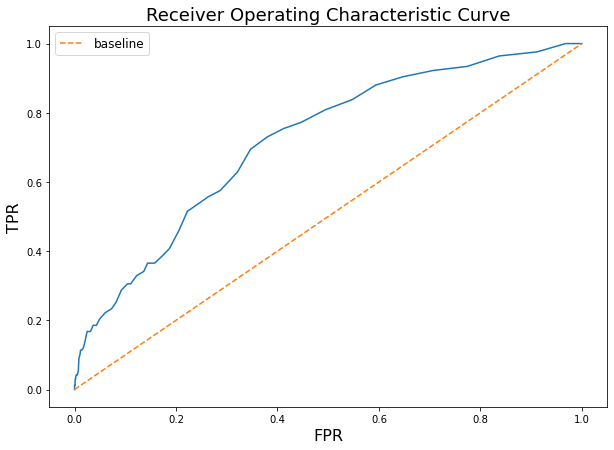

In [108]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(fpr_values, tpr_values)
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.title('Receiver Operating Characteristic Curve', fontsize=18)
plt.ylabel('TPR', fontsize=16)
plt.xlabel('FPR', fontsize=16)
plt.legend(fontsize=12);

In [110]:
from sklearn.metrics import roc_auc_score
roc_auc_score(heartY_test, preds)

0.5

#### Result: From above results, we can see that the Multinomial Logistic Regression model have the best prediction

# Part C: Clustering

[0 1 1 ... 1 1 0]
[1]


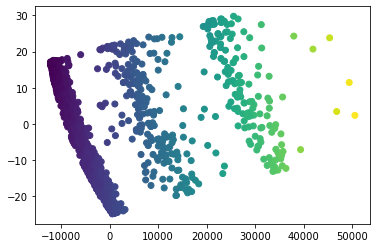

In [129]:
from sklearn.cluster import KMeans
# initialize KMeans object specifying the number of desired clusters
kmeans = KMeans(n_clusters=3)

# learning the clustering from the insurance_Data
kmeans.fit(insurance_Data.values)

# output the labels for the insurance_Data
print(kmeans.labels_)

# predict the classification for given data sample 
predicted_class = kmeans.predict([[34,1,.0,3,0,2,10600.55]])
print(predicted_class)

from sklearn.decomposition import PCA
pca_2 = PCA(2)

# Turn the insurance data into two columns with PCA
plot_columns = pca_2.fit_transform(insurance_Data.iloc[:,:7])
# Plot senators based on the two dimensions, and shade by cluster expenses
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=insurance_Data["expenses"])
plt.show()